libraries များကို import ပြုလုပ်ခြင်း

In [1]:
import pandas as pd   # data structure and data analysis ပြုလုပ်ရန်
from sklearn import tree # Decision Tree classifier အား import ပြုလုပ်ခြင်း
from sklearn.preprocessing import LabelEncoder # label , feature များအား encode ပြုလုပ်ရန်
import graphviz # Graph ဖော်ပြရန်

Dataset ကို ရယူရန်

In [2]:
Data = pd.read_csv('PlayTennis.csv')
Data

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


Label များကို Encode ပြုလုပ်ရန်

In [3]:
Le = LabelEncoder() 

Data['Outlook'] = Le.fit_transform(Data['Outlook'])
Data['Temperature'] = Le.fit_transform(Data['Temperature'])
Data['Humidity'] = Le.fit_transform(Data['Humidity'])
Data['Wind'] = Le.fit_transform(Data['Wind'])
Data['Play'] = Le.fit_transform(Data['Play'])

Encoded Label ပြုလုပ်ထာသော Dataset ကို ကြည့်ရန်

In [4]:
Data

,Outlook,Temperature,Humidity,Wind,Play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


Decision Tree တည်ဆောက်ရန် Feature data(X) နှင့် Target data(Y) ကို သတ်မှတ်ပေးရန်

In [5]:
f_names = ['Outlook','Temperature','Humidity','Wind']
l_names = ['Play']
#label = ['Yes','No']
X = Data[f_names]
Y = Data[l_names]

Feature data(X) နှင့် Target data(Y) ကို ကြည့်မြင်ရန်

In [6]:
Y

,Play
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


Decision Tree classifier ရယူ၍ classification model တည်ဆောက်ရန်

In [7]:
clf = tree.DecisionTreeClassifier(criterion='entropy', )
clf = clf.fit(X,Y)

In [8]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  1.50
|   |   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_0 <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  1.50
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: 1



[Text(148.8, 195.696, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(111.60000000000001, 152.208, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(186.0, 152.208, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(111.60000000000001, 108.72, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(74.4, 65.232, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(37.2, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(111.60000000000001, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(148.8, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(260.40000000000003, 108.72, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(223.20000000000002, 65.232, 'X[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(186.0, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(260.40000000000003, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(297.6, 65.232,

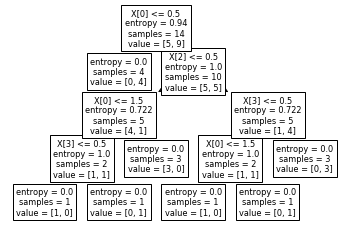

In [9]:
tree.plot_tree(clf)

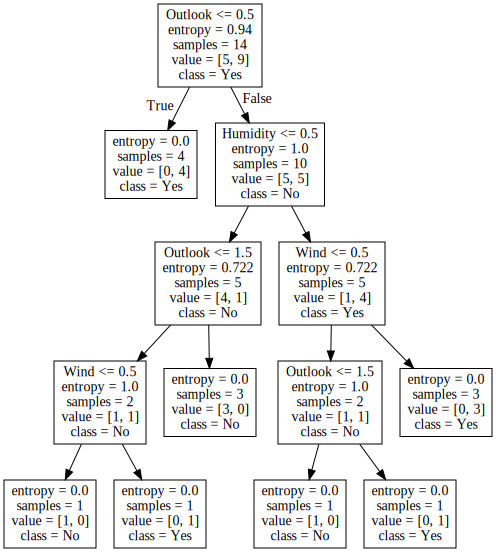

In [10]:
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=['Outlook','Temperature','Humidity','Wind'],class_names=['No','Yes']) 
graph = graphviz.Source(dot_data) 
graph

In [ ]:
type(l_names)

In [ ]:
l_names